# 金属成分工艺316L多目标回归简单验证

In [45]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams["font.family"] = ["PingFang HK"]

In [46]:
file_path = "./金属成分工艺316L-简化.csv"
data_raw = np.genfromtxt(file_path, delimiter=",", skip_header=2)[:, 1:]

print(data_raw.shape)
# print(data_raw)

input = data_raw[:, 0:5]
# print(input)
output = data_raw[:, 5:]
#print(output)

(36, 10)


## 输入之间的线性相关性

<Axes: >

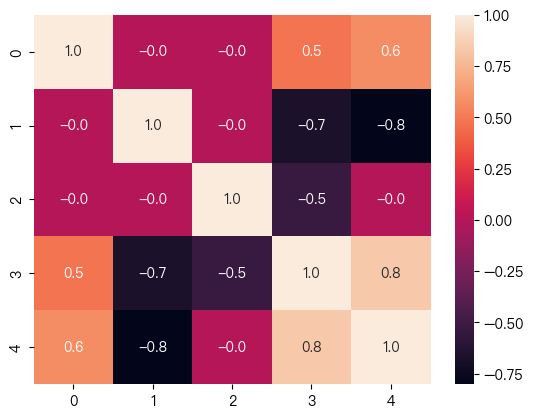

In [47]:
input_df = pd.DataFrame(input)
sns.heatmap(input_df.corr(), annot=True, fmt=".1f")

(1,3) (2,5) (1,4) 负相关
(0,3) (0,4) (3,4) 正相关
(0,1) (0,2) (1,2) 无相关

## 输入输出的数据分布

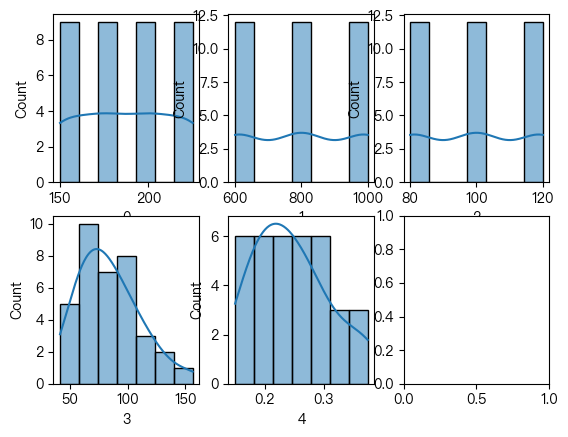

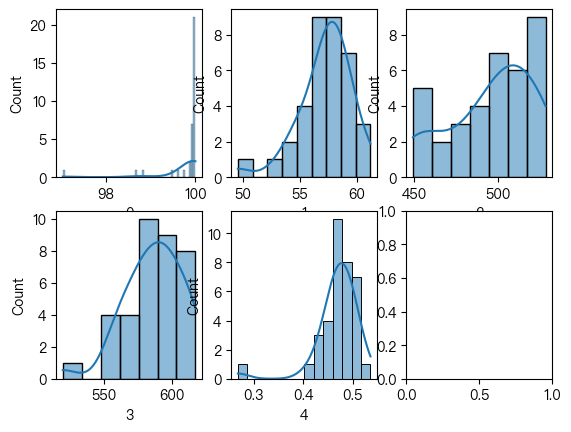

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for i, col in enumerate(input_df.columns):
    sns.histplot(input_df[col], ax=axes[i // 3, i % 3], kde=True)


output_df = pd.DataFrame(output)
fig, axes = plt.subplots(nrows=2, ncols=3)
for i, col in enumerate(output_df.columns):
    sns.histplot(output_df[col], ax=axes[i // 3, i % 3], kde=True)

## 单个输入与单个输出的(线性)关系

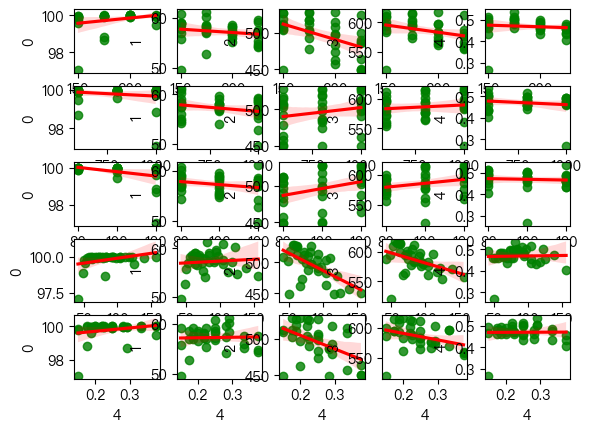

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=5)
for i, col_x in enumerate(input_df.columns):
    for j, col_y in enumerate(output_df.columns):
        sns.regplot(
            x=input_df[col_x],
            y=output_df[col_y],
            ax=axes[i, j],
            scatter_kws={"color": "green"},
            line_kws={"color": "red"},
        )

单个输入输出之间几乎不存在简单的线性关系

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2)

%% [markdown]
"""
## 简单线性回归
"""

UsageError: Line magic function `%%` not found.


In [ ]:
linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

%% [markdown]
"""
## 随机森林回归
"""

In [ ]:
rdf = RandomForestRegressor()
rdf.fit(x_train, y_train)
y_pred = rdf.predict(x_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

结果仍不乐观, 但随机森林回归的表现比简单线性回归好很多, 结果也很稳定。

In [ ]:
multi_svm = MultiOutputRegressor(SVR(kernel="rbf", C=2.0, epsilon=0.1))
multi_svm.fit(x_train, y_train)
y_pred = multi_svm.predict(x_test)

print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

## 总结

R2: -> 1 模型越好; -> 0 模型越差 ; 负值 --

结果: R2 得分很低, 很多时候为负值

可能原因:
1. 数据呈现出很强的非线性，用线性模型进行拟合是个糟糕的选择
2. 数据量相对于其背后生成该数据的模型体量太小
3. 数据没做预处理? 需要结合具体算法进行分析

下一步:
1. 调研多目标回归的最新成果(尤其是目标个数较多的情况)
2. 更充分的理解数据, 各类算法对数据的要求(正则化, 超参数)
3. 获取更多的数据